In [1]:
%reload_ext autoreload
%autoreload 2
# Preprocessig data 
from library.data_preprocess import * 
import torchsummary as summary 
BATCH_SIZE = 33 
X_train_valid_subs, y_train_valid_subs, X_test_subs, y_test_subs, dataset_train, dataset_test = proprocess(BATCH_SIZE= 32, verbose= False)

In [2]:
from library.utils import * 
# Toggle verbose [True/False] to choose if you want the content printed
X_train_valid_tensor, y_train_valid_tensor = np_to_tensor(dataset_train, verbose = False, mode = 'train')
X_test_tensor, y_test_tensor = np_to_tensor(dataset_test, verbose = False, mode = 'test')

# numpy to tensor for each subject respectively
# Toggle verbose [True/False] to choose if you want the content printed
X_train_valid_tensor_subs, y_train_valid_tensor_subs = np_to_tensor_subs(X_train_valid_subs, y_train_valid_subs, verbose = False, mode = 'train')
X_test_tensor_subs, y_test_tensor_subs = np_to_tensor_subs(X_test_subs, y_test_subs, verbose = False, mode = 'test')

In [3]:
%reload_ext autoreload
%autoreload 2
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
X_train_valid_tensor = X_train_valid_tensor.to(device)
y_train_valid_tensor = y_train_valid_tensor.to(device)
X_test_tensor = X_test_tensor.to(device)
y_test_tensor = y_test_tensor.to(device)





dataloaders= data_load( X_train_valid_tensor, 
                        y_train_valid_tensor,
                        X_test_tensor, 
                        y_test_tensor,
                        batch_size = BATCH_SIZE)
# Splitted data, person 0-8
dataloaders_subs = data_subs_load(  X_train_valid_tensor_subs, 
                                    y_train_valid_tensor_subs, 
                                    X_test_tensor_subs, 
                                    y_test_tensor_subs, 
                                    batch_size = BATCH_SIZE) 

Shallow CNN 

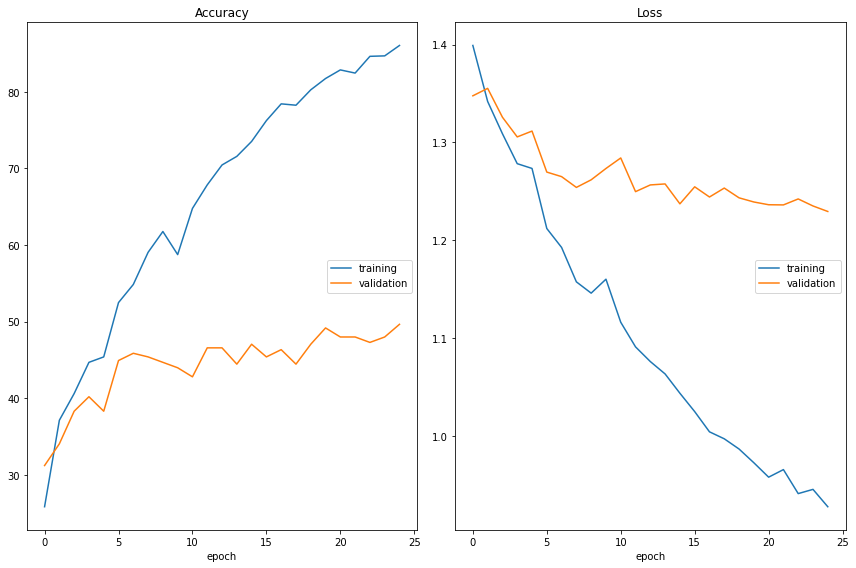

Accuracy
	training         	 (min:   25.827, max:   86.052, cur:   86.052)
	validation       	 (min:   31.206, max:   49.645, cur:   49.645)
Loss
	training         	 (min:    0.928, max:    1.399, cur:    0.928)
	validation       	 (min:    1.229, max:    1.355, cur:    1.229)
Epoch 25/99
----------
LR 0.0005


In [4]:
# Shallow CNN model training
%reload_ext autoreload
%autoreload 2
from library.models import * 
from library.solver import *  
LR      = 0.0005
BETAS   = (0.9, 0.999)
EPS     = 1e-08
DECAY   = 0.0005

BATCH_SIZE = 32
EPOCHS  = 100
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model_Shallow_CNN = Shallow_CNN().to(device)
optimizer = torch.optim.Adam(model_Shallow_CNN.parameters(), lr=LR, betas=BETAS, eps=EPS, weight_decay=DECAY)
train_model(model_Shallow_CNN, "model_Shallow_CNN",optimizer, EPOCHS, dataloaders)

#Loading model
path = "../project/Best_Models/model_Shallow_CNN.pt"
model_test = torch.load(path)
model_test = model_test.to(device)
criterion = nn.CrossEntropyLoss()
test_model(model_test,dataloaders['test'], criterion)


GRU

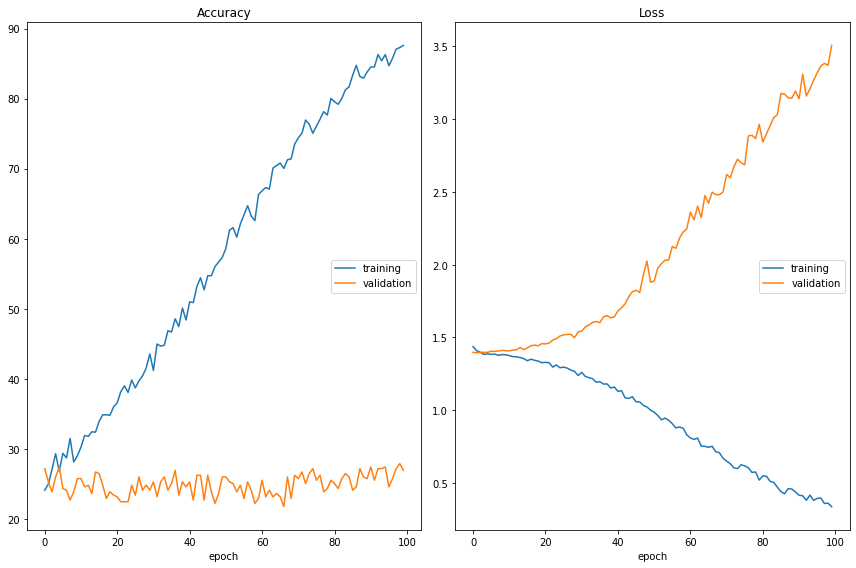

Accuracy
	training         	 (min:   24.113, max:   87.589, cur:   87.589)
	validation       	 (min:   21.749, max:   27.896, cur:   26.950)
Loss
	training         	 (min:    0.337, max:    1.437, cur:    0.337)
	validation       	 (min:    1.396, max:    3.507, cur:    3.507)
Test loss tensor(10.4394, device='cuda:0')
Test accuracy 26.86230248306998


0.2686230248306998

In [6]:
# GRU model training
%reload_ext autoreload
%autoreload 2
from library.models import * 
from library.solver import *  
LR      = 0.0005
BETAS   = (0.9, 0.999)
EPS     = 1e-08
DECAY   = 0.0005

BATCH_SIZE = 32
EPOCHS  = 100
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model_GRU = GRU().to(device)
optimizer = torch.optim.Adam(model_GRU.parameters(), lr=LR, betas=BETAS, eps=EPS, weight_decay=DECAY)
train_model(model_GRU, "model_GRU",optimizer, EPOCHS, dataloaders)

#Loading model
path = "../project/Best_Models/model_GRU.pt"
model_test = torch.load(path)
model_test = model_test.to(device)
criterion = nn.CrossEntropyLoss()
test_model(model_test,dataloaders['test'], criterion)

LSTM

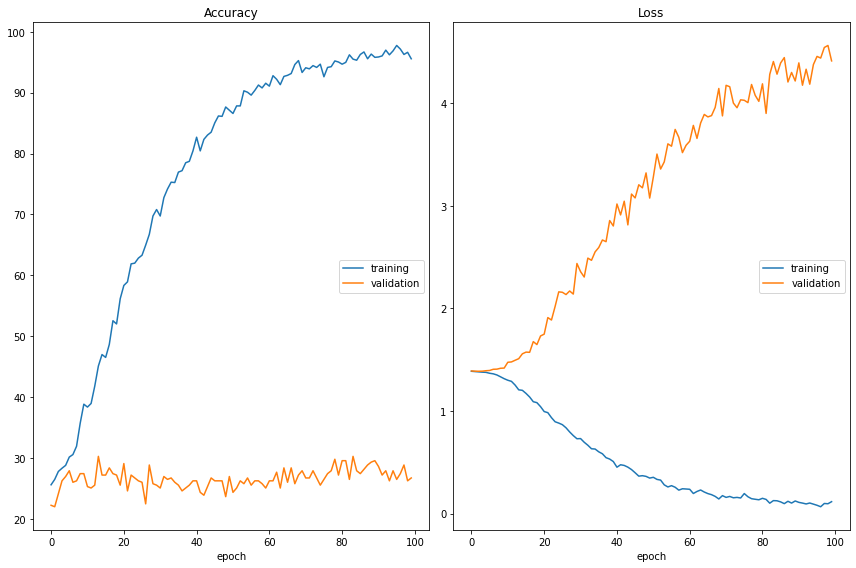

Accuracy
	training         	 (min:   25.591, max:   97.754, cur:   95.567)
	validation       	 (min:   21.986, max:   30.260, cur:   26.714)
Loss
	training         	 (min:    0.067, max:    1.388, cur:    0.117)
	validation       	 (min:    1.388, max:    4.563, cur:    4.413)
Test loss tensor(4.5246, device='cuda:0')
Test accuracy 23.25056433408578


0.2325056433408578

In [7]:
# LSTM model 
%reload_ext autoreload
%autoreload 2
from library.models import * 
from library.solver import *  
LR      = 0.0005
BETAS   = (0.9, 0.999)
EPS     = 1e-08
DECAY   = 0.0005

BATCH_SIZE = 32
EPOCHS  = 100
SAVE = False
#CNN Trainig 
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model_LSTM = LSTM().to(device)
optimizer = torch.optim.Adam(model_LSTM.parameters(), lr=LR, betas=BETAS, eps=EPS, weight_decay=DECAY)
train_model(model_LSTM, "model_LSTM", optimizer, EPOCHS, dataloaders)

#Loading model
path = "../project/Best_Models/model_LSTM.pt"
model_test = torch.load(path)
model_test = model_test.to(device)
criterion = nn.CrossEntropyLoss()
test_model(model_test,dataloaders['test'],criterion)

CNN Baseline

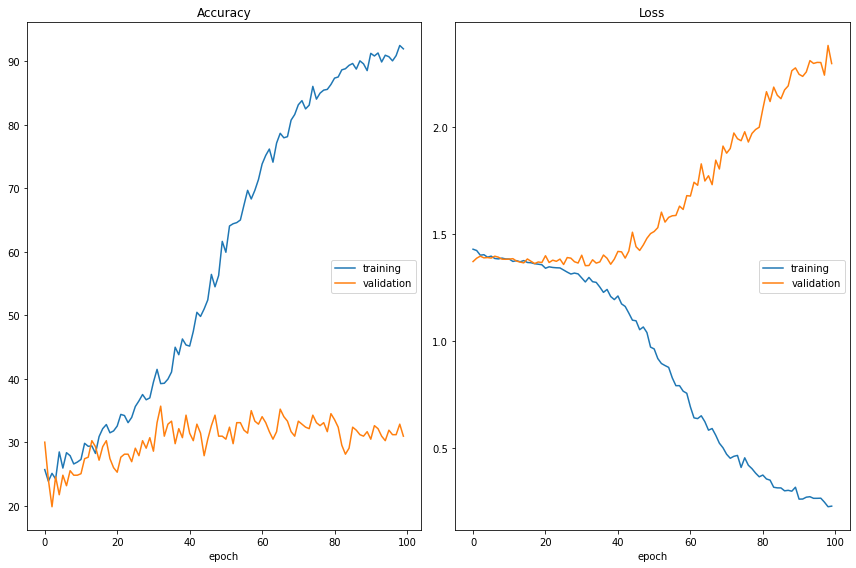

Accuracy
	training         	 (min:   23.877, max:   92.494, cur:   91.962)
	validation       	 (min:   19.858, max:   35.697, cur:   30.969)
Loss
	training         	 (min:    0.226, max:    1.430, cur:    0.229)
	validation       	 (min:    1.353, max:    2.382, cur:    2.298)


0.29345372460496616

In [4]:
%reload_ext autoreload
%autoreload 2
from library.models import * 
from library.solver import *  
LR      = 0.0005
BETAS   = (0.9, 0.999)
EPS     = 1e-08
DECAY   = 0.0005

BATCH_SIZE = 32
EPOCHS  = 100
#CNN Trainig 
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model_CNN = CNN().to(device)
optimizer = torch.optim.Adam(model_CNN.parameters(), lr=LR, betas=BETAS, eps=EPS, weight_decay=DECAY)
train_model(model_CNN, "model_CNN", optimizer, EPOCHS, dataloaders)

#Loading model
path = "../project/Best_Models/model_CNN.pt"
model_test = torch.load(path)
model_test = model_test.to(device)
criterion = nn.CrossEntropyLoss()
test_model(model_test,dataloaders['test'],criterion)

CNN + GRU (version 1)

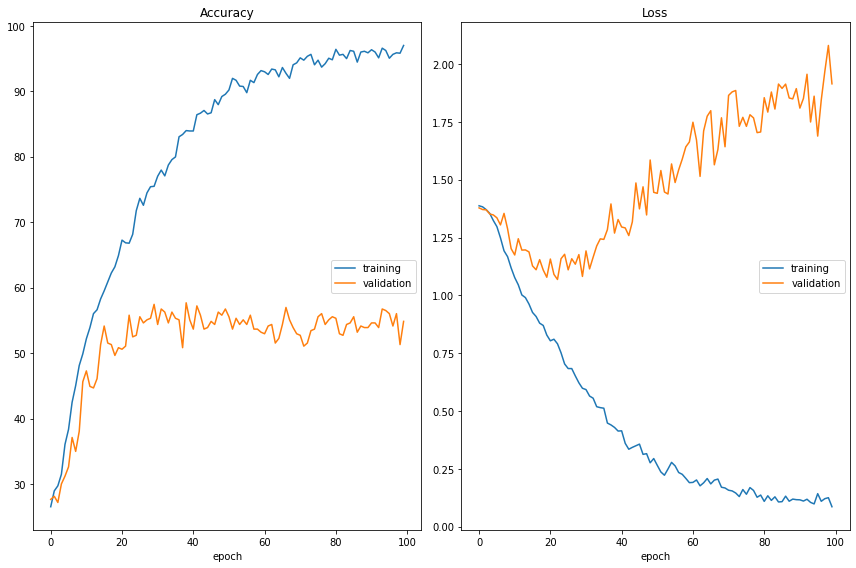

Accuracy
	training         	 (min:   26.537, max:   96.986, cur:   96.986)
	validation       	 (min:   27.187, max:   57.683, cur:   54.846)
Loss
	training         	 (min:    0.086, max:    1.387, cur:    0.086)
	validation       	 (min:    1.069, max:    2.080, cur:    1.914)
Test loss tensor(2.2532, device='cuda:0')
Test accuracy 55.75620767494357


0.5575620767494357

In [11]:
%reload_ext autoreload
%autoreload 2
from library.models import * 
from library.solver import *  
LR      = 0.0005
BETAS   = (0.9, 0.999)
EPS     = 1e-08
DECAY   = 0.0005

BATCH_SIZE = 32
EPOCHS  = 100
#CNN Trainig 
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model = CNN_GRU_v1().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=LR, betas=BETAS, eps=EPS, weight_decay=DECAY)
train_model(model, "model_CNN_GRU_v1", optimizer, EPOCHS, dataloaders)

#Loading model
path = "../project/Best_Models/model_CNN_GRU_v1.pt"
model_test = torch.load(path)
model_test = model_test.to(device)
criterion = nn.CrossEntropyLoss()
test_model(model_test,dataloaders['test'],criterion)

CNN + GRU (version 2)

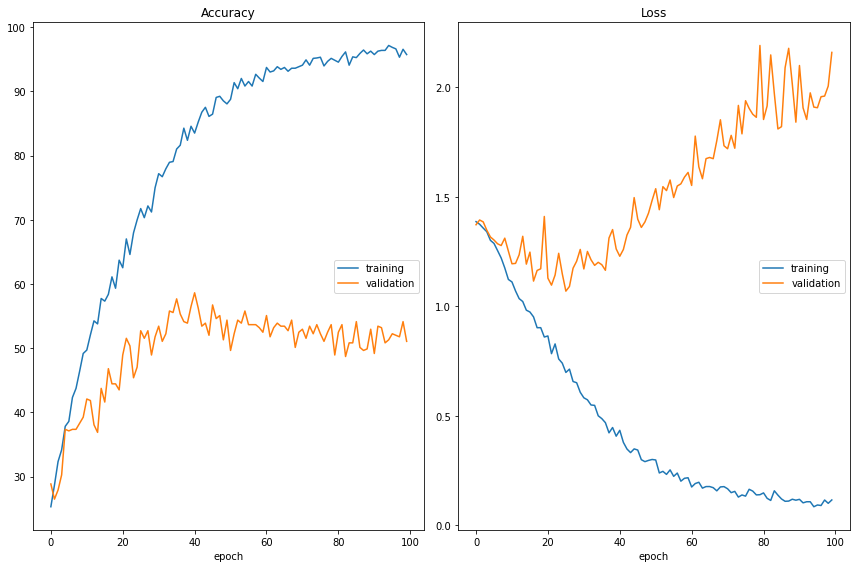

Accuracy
	training         	 (min:   25.296, max:   97.163, cur:   95.745)
	validation       	 (min:   26.478, max:   58.629, cur:   51.064)
Loss
	training         	 (min:    0.084, max:    1.387, cur:    0.115)
	validation       	 (min:    1.069, max:    2.192, cur:    2.160)
Test loss tensor(0.4531, device='cuda:0')
Test accuracy 56.20767494356659


0.5620767494356659

In [8]:
%reload_ext autoreload
%autoreload 2
from library.models import * 
from library.solver import *  
LR      = 0.0005
BETAS   = (0.9, 0.999)
EPS     = 1e-08
DECAY   = 0.0005

BATCH_SIZE = 32
EPOCHS  = 100
SAVE = True
#CNN Trainig 
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model_CNN_GRU_v2 = CNN_GRU_v2().to(device)
optimizer = torch.optim.Adam(model_CNN_GRU_v2.parameters(), lr=LR, betas=BETAS, eps=EPS, weight_decay=DECAY)
train_model(model_CNN_GRU_v2, "model_CNN_GRU_v2",optimizer, EPOCHS, dataloaders)

#Loading model
path = "../project/Best_Models/model_CNN_GRU_v2.pt"
model_test = torch.load(path)
model_test = model_test.to(device)
criterion = nn.CrossEntropyLoss()
test_model(model_test,dataloaders['test'],criterion)

CNN + LSTM

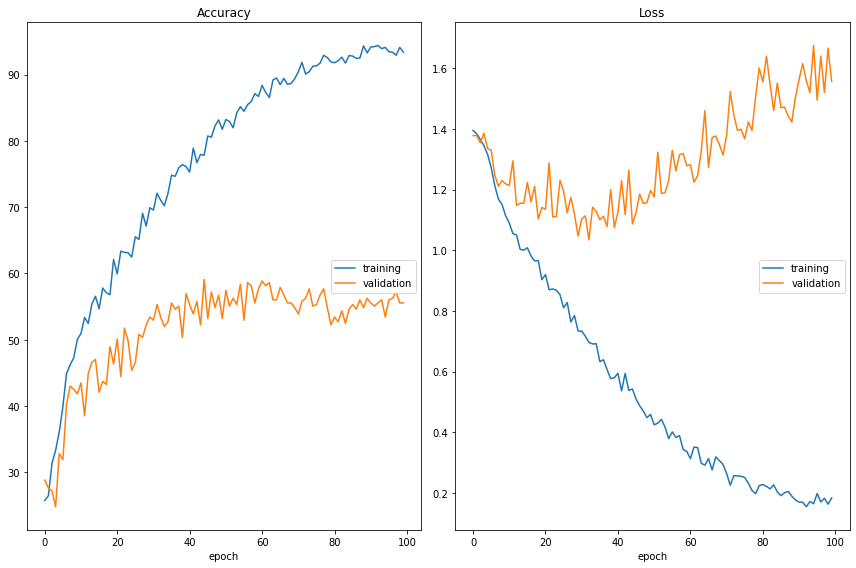

Accuracy
	training         	 (min:   25.768, max:   94.385, cur:   93.381)
	validation       	 (min:   24.823, max:   59.102, cur:   55.556)
Loss
	training         	 (min:    0.155, max:    1.395, cur:    0.184)
	validation       	 (min:    1.034, max:    1.675, cur:    1.556)
Test loss tensor(2.0200, device='cuda:0')
Test accuracy 55.07900677200903


0.5507900677200903

In [10]:
# CNN_LSTM model 
%reload_ext autoreload
%autoreload 2
from library.models import * 
from library.solver import *  
LR      = 0.0005
BETAS   = (0.9, 0.999)
EPS     = 1e-08
DECAY   = 0.0005

BATCH_SIZE = 32
EPOCHS  = 100
SAVE = False # Save the model or not    
#CNN Trainig 
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model_CNN_LSTM = CNN_LSTM().to(device)
optimizer = torch.optim.Adam(model_CNN_LSTM.parameters(), lr=LR, betas=BETAS, eps=EPS, weight_decay=DECAY)
train_model(model_CNN_LSTM, "model_CNN_LSTM", optimizer, EPOCHS, dataloaders)


# Load model
path = "../project/Best_Models/model_CNN_LSTM.pt" 
model_test = torch.load(path)
model_test = model_test.to(device)
criterion = nn.CrossEntropyLoss()
test_model(model_test, dataloaders['test'],criterion)


Optimize the classifiaction accuracy for subject 1


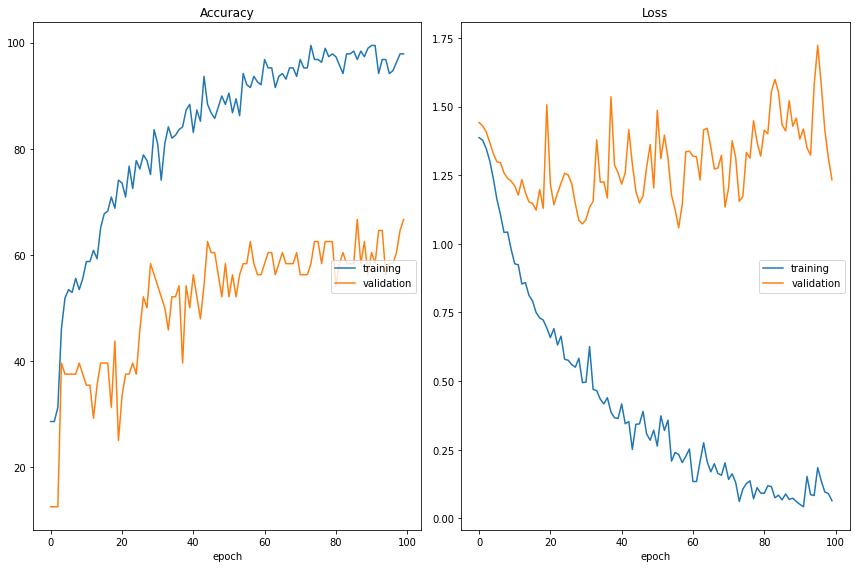

Accuracy
	training         	 (min:   28.571, max:   99.471, cur:   97.884)
	validation       	 (min:   12.500, max:   66.667, cur:   66.667)
Loss
	training         	 (min:    0.042, max:    1.387, cur:    0.064)
	validation       	 (min:    1.059, max:    1.722, cur:    1.233)


0.37697516930022573

In [7]:
# CNN_LSTM model for sub1
%reload_ext autoreload
%autoreload 2
from library.models import * 
from library.solver import *  
LR      = 0.0005
BETAS   = (0.9, 0.999)
EPS     = 1e-08
DECAY   = 0.0005

BATCH_SIZE = 32
EPOCHS  = 100
SAVE = False # Save the model or not    
#CNN Trainig 
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model_CNN_LSTM = CNN_LSTM().to(device)
optimizer = torch.optim.Adam(model_CNN_LSTM.parameters(), lr=LR, betas=BETAS, eps=EPS, weight_decay=DECAY)
train_model(model_CNN_LSTM, "model_CNN_LSTM_sub1", optimizer, EPOCHS, dataloaders_subs[0])


# Load model
path = "../project/Best_Models/model_CNN_LSTM_sub1.pt" 
model_test = torch.load(path)
model_test = model_test.to(device)
criterion = nn.CrossEntropyLoss()
test_model(model_test, dataloaders['test'],criterion)

Optimize the classifiaction accuracy for subject 2

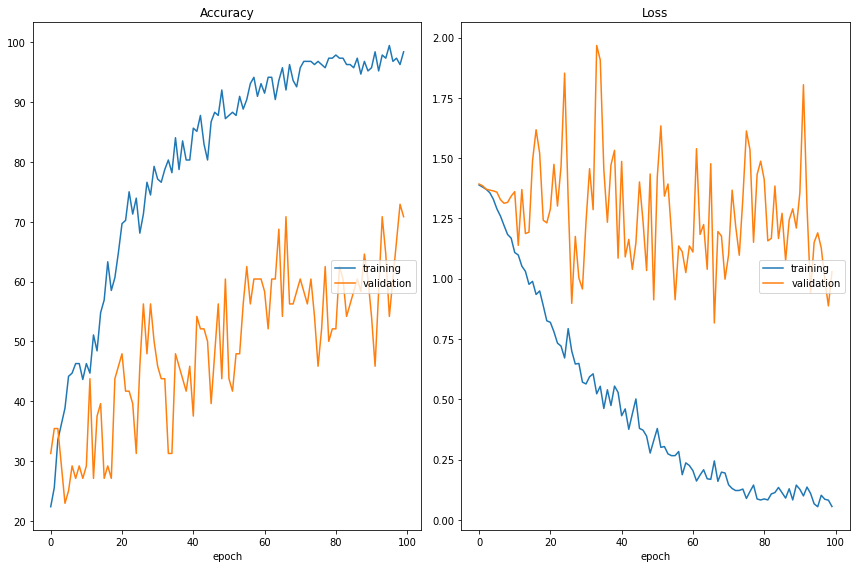

Accuracy
	training         	 (min:   22.340, max:   99.468, cur:   98.404)
	validation       	 (min:   22.917, max:   72.917, cur:   70.833)
Loss
	training         	 (min:    0.054, max:    1.388, cur:    0.055)
	validation       	 (min:    0.816, max:    1.967, cur:    1.029)


0.3927765237020316

In [8]:
# CNN_LSTM model for sub2
%reload_ext autoreload
%autoreload 2
from library.models import * 
from library.solver import *  
LR      = 0.0005
BETAS   = (0.9, 0.999)
EPS     = 1e-08
DECAY   = 0.0005

BATCH_SIZE = 32
EPOCHS  = 100
SAVE = False # Save the model or not    
#CNN Trainig 
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model_CNN_LSTM = CNN_LSTM().to(device)
optimizer = torch.optim.Adam(model_CNN_LSTM.parameters(), lr=LR, betas=BETAS, eps=EPS, weight_decay=DECAY)
train_model(model_CNN_LSTM, "model_CNN_LSTM_sub2", optimizer, EPOCHS, dataloaders_subs[1])


# Load model
path = "../project/Best_Models/model_CNN_LSTM_sub2.pt" 
model_test = torch.load(path)
model_test = model_test.to(device)
criterion = nn.CrossEntropyLoss()
test_model(model_test, dataloaders['test'],criterion)

Optimize classification accuracy for subject 3


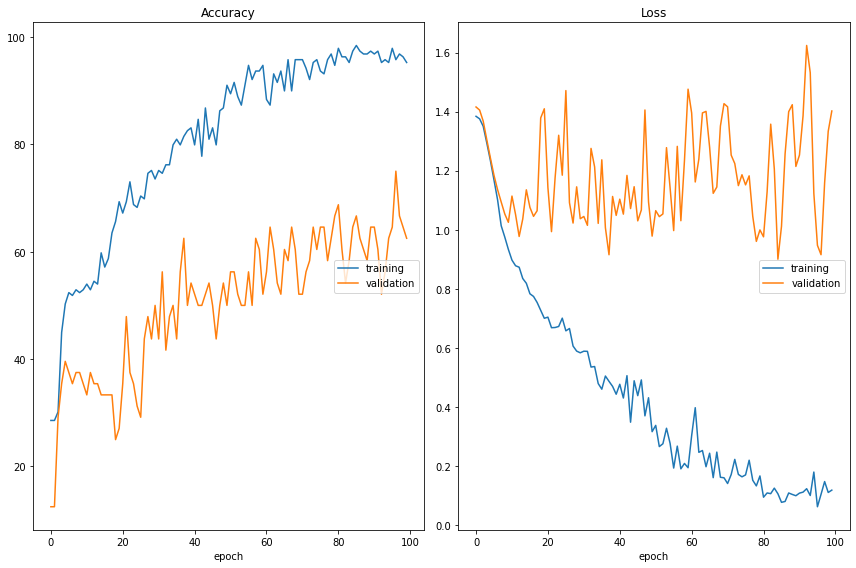

Accuracy
	training         	 (min:   28.571, max:   98.413, cur:   95.238)
	validation       	 (min:   12.500, max:   75.000, cur:   62.500)
Loss
	training         	 (min:    0.062, max:    1.384, cur:    0.118)
	validation       	 (min:    0.900, max:    1.624, cur:    1.402)


0.38148984198645597

In [9]:
# CNN_LSTM model for sub3
%reload_ext autoreload
%autoreload 2
from library.models import * 
from library.solver import *  
LR      = 0.0005
BETAS   = (0.9, 0.999)
EPS     = 1e-08
DECAY   = 0.0005

BATCH_SIZE = 32
EPOCHS  = 100
SAVE = False # Save the model or not    
#CNN Trainig 
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model_CNN_LSTM = CNN_LSTM().to(device)
optimizer = torch.optim.Adam(model_CNN_LSTM.parameters(), lr=LR, betas=BETAS, eps=EPS, weight_decay=DECAY)
train_model(model_CNN_LSTM, "model_CNN_LSTM_sub3", optimizer, EPOCHS, dataloaders_subs[2])


# Load model
path = "../project/Best_Models/model_CNN_LSTM_sub3.pt" 
model_test = torch.load(path)
model_test = model_test.to(device)
criterion = nn.CrossEntropyLoss()
test_model(model_test, dataloaders['test'],criterion)

Optimize classification accuracy with subject 4

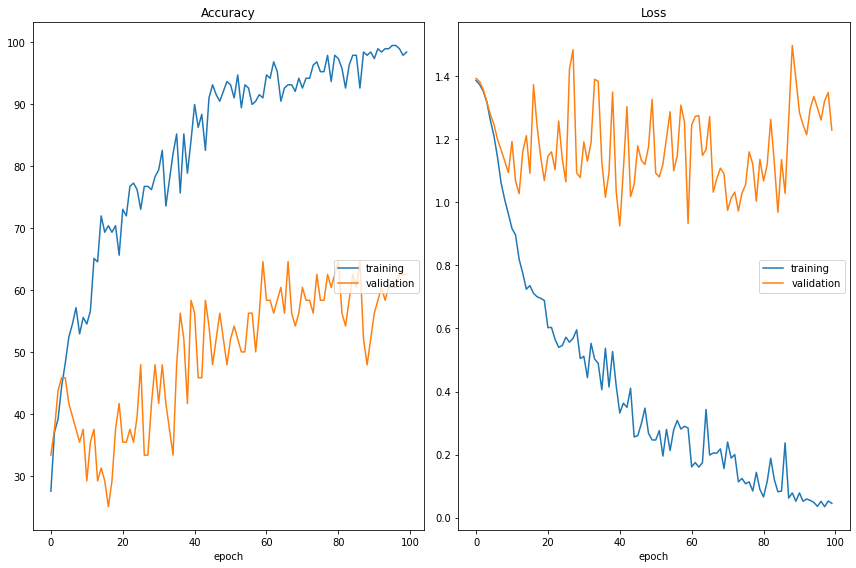

Accuracy
	training         	 (min:   27.513, max:   99.471, cur:   98.413)
	validation       	 (min:   25.000, max:   64.583, cur:   62.500)
Loss
	training         	 (min:    0.034, max:    1.387, cur:    0.045)
	validation       	 (min:    0.925, max:    1.498, cur:    1.229)


0.35214446952595935

In [10]:
# CNN_LSTM model for sub4
%reload_ext autoreload
%autoreload 2
from library.models import * 
from library.solver import *  
LR      = 0.0005
BETAS   = (0.9, 0.999)
EPS     = 1e-08
DECAY   = 0.0005

BATCH_SIZE = 32
EPOCHS  = 100
SAVE = False # Save the model or not    
#CNN Trainig 
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model_CNN_LSTM = CNN_LSTM().to(device)
optimizer = torch.optim.Adam(model_CNN_LSTM.parameters(), lr=LR, betas=BETAS, eps=EPS, weight_decay=DECAY)
train_model(model_CNN_LSTM, "model_CNN_LSTM_sub4", optimizer, EPOCHS, dataloaders_subs[3])


# Load model
path = "../project/Best_Models/model_CNN_LSTM_sub4.pt" 
model_test = torch.load(path)
model_test = model_test.to(device)
criterion = nn.CrossEntropyLoss()
test_model(model_test, dataloaders['test'],criterion)


Optimize Classification accuracy with subject 5


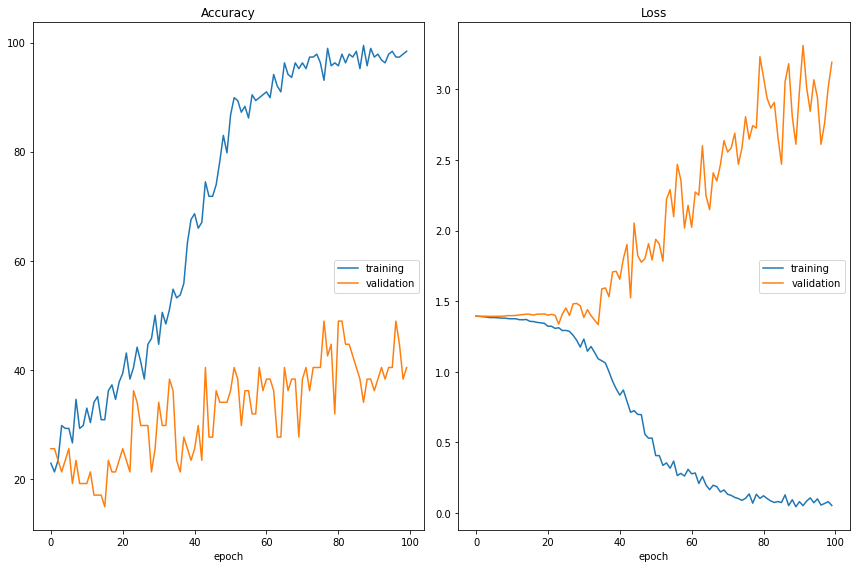

Accuracy
	training         	 (min:   21.277, max:   99.468, cur:   98.404)
	validation       	 (min:   14.894, max:   48.936, cur:   40.426)
Loss
	training         	 (min:    0.045, max:    1.394, cur:    0.054)
	validation       	 (min:    1.334, max:    3.310, cur:    3.191)


0.26410835214446954

In [12]:
# CNN_LSTM model for sub5
%reload_ext autoreload
%autoreload 2
from library.models import * 
from library.solver import *  
LR      = 0.0005
BETAS   = (0.9, 0.999)
EPS     = 1e-08
DECAY   = 0.0005

BATCH_SIZE = 32
EPOCHS  = 100
SAVE = False # Save the model or not    
#CNN Trainig 
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model_CNN_LSTM = CNN_LSTM().to(device)
optimizer = torch.optim.Adam(model_CNN_LSTM.parameters(), lr=LR, betas=BETAS, eps=EPS, weight_decay=DECAY)
train_model(model_CNN_LSTM, "model_CNN_LSTM_sub5", optimizer, EPOCHS, dataloaders_subs[4])


# Load model
path = "../project/Best_Models/model_CNN_LSTM_sub5.pt" 
model_test = torch.load(path)
model_test = model_test.to(device)
criterion = nn.CrossEntropyLoss()
test_model(model_test, dataloaders['test'],criterion)


Optimize Classification with sub 6


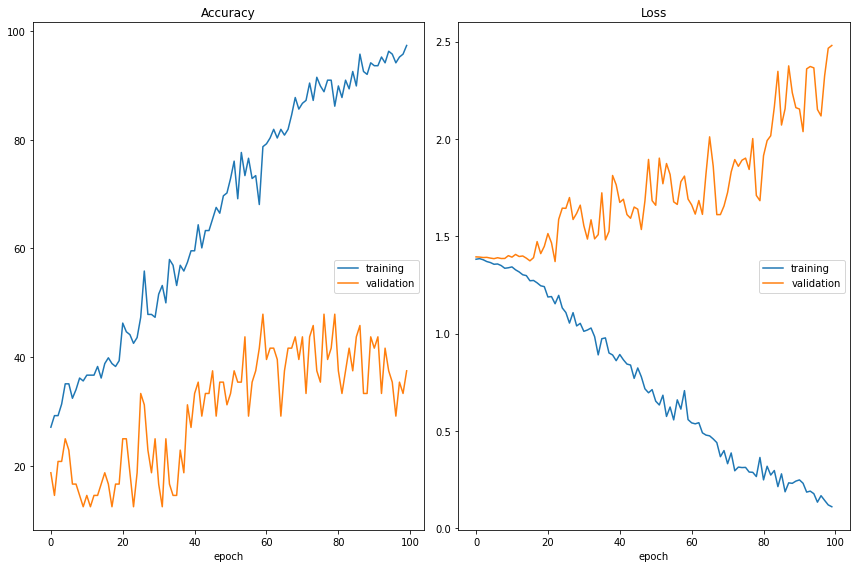

Accuracy
	training         	 (min:   27.128, max:   97.340, cur:   97.340)
	validation       	 (min:   12.500, max:   47.917, cur:   37.500)
Loss
	training         	 (min:    0.111, max:    1.386, cur:    0.111)
	validation       	 (min:    1.370, max:    2.481, cur:    2.481)


0.30699774266365687

In [13]:
# CNN_LSTM model for sub6
%reload_ext autoreload
%autoreload 2
from library.models import * 
from library.solver import *  
LR      = 0.0005
BETAS   = (0.9, 0.999)
EPS     = 1e-08
DECAY   = 0.0005

BATCH_SIZE = 32
EPOCHS  = 100
SAVE = False # Save the model or not    
#CNN Trainig 
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model_CNN_LSTM = CNN_LSTM().to(device)
optimizer = torch.optim.Adam(model_CNN_LSTM.parameters(), lr=LR, betas=BETAS, eps=EPS, weight_decay=DECAY)
train_model(model_CNN_LSTM, "model_CNN_LSTM_sub6", optimizer, EPOCHS, dataloaders_subs[5])


# Load model
path = "../project/Best_Models/model_CNN_LSTM_sub6.pt" 
model_test = torch.load(path)
model_test = model_test.to(device)
criterion = nn.CrossEntropyLoss()
test_model(model_test, dataloaders['test'],criterion)


Optimize Classification with sub 7


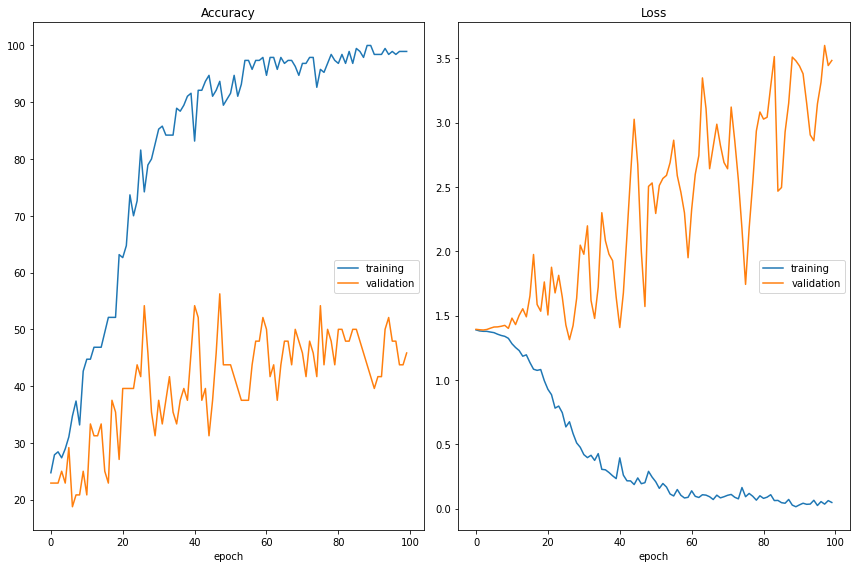

Accuracy
	training         	 (min:   24.737, max:  100.000, cur:   98.947)
	validation       	 (min:   18.750, max:   56.250, cur:   45.833)
Loss
	training         	 (min:    0.015, max:    1.389, cur:    0.048)
	validation       	 (min:    1.314, max:    3.600, cur:    3.484)


0.35214446952595935

In [14]:
# CNN_LSTM model for sub7
%reload_ext autoreload
%autoreload 2
from library.models import * 
from library.solver import *  
LR      = 0.0005
BETAS   = (0.9, 0.999)
EPS     = 1e-08
DECAY   = 0.0005

BATCH_SIZE = 32
EPOCHS  = 100
SAVE = False # Save the model or not    
#CNN Trainig 
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model_CNN_LSTM = CNN_LSTM().to(device)
optimizer = torch.optim.Adam(model_CNN_LSTM.parameters(), lr=LR, betas=BETAS, eps=EPS, weight_decay=DECAY)
train_model(model_CNN_LSTM, "model_CNN_LSTM_sub7", optimizer, EPOCHS, dataloaders_subs[6])


# Load model
path = "../project/Best_Models/model_CNN_LSTM_sub7.pt" 
model_test = torch.load(path)
model_test = model_test.to(device)
criterion = nn.CrossEntropyLoss()
test_model(model_test, dataloaders['test'],criterion)


Optimize Classification with sub 8


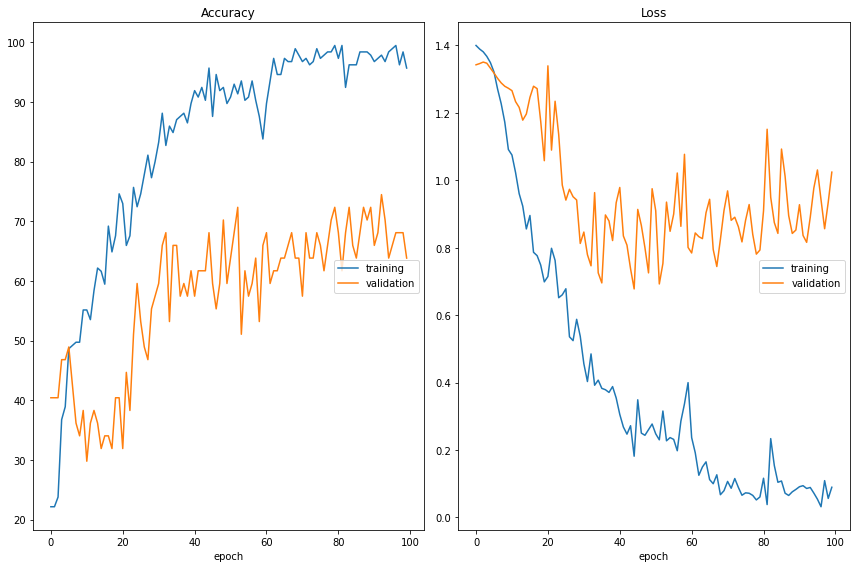

Accuracy
	training         	 (min:   22.162, max:   99.459, cur:   95.676)
	validation       	 (min:   29.787, max:   74.468, cur:   63.830)
Loss
	training         	 (min:    0.032, max:    1.400, cur:    0.089)
	validation       	 (min:    0.678, max:    1.351, cur:    1.024)


0.2799097065462754

In [15]:
# CNN_LSTM model for sub8
%reload_ext autoreload
%autoreload 2
from library.models import * 
from library.solver import *  
LR      = 0.0005
BETAS   = (0.9, 0.999)
EPS     = 1e-08
DECAY   = 0.0005

BATCH_SIZE = 32
EPOCHS  = 100
SAVE = False # Save the model or not    
#CNN Trainig 
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model_CNN_LSTM = CNN_LSTM().to(device)
optimizer = torch.optim.Adam(model_CNN_LSTM.parameters(), lr=LR, betas=BETAS, eps=EPS, weight_decay=DECAY)
train_model(model_CNN_LSTM, "model_CNN_LSTM_sub8", optimizer, EPOCHS, dataloaders_subs[7])


# Load model
path = "../project/Best_Models/model_CNN_LSTM_sub8.pt" 
model_test = torch.load(path)
model_test = model_test.to(device)
criterion = nn.CrossEntropyLoss()
test_model(model_test, dataloaders['test'],criterion)


Optimize Classification with Sub 9


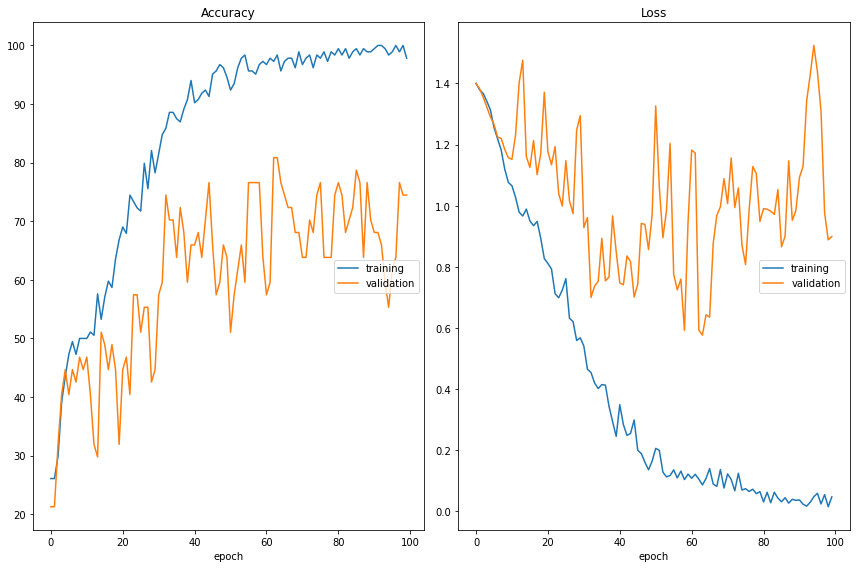

Accuracy
	training         	 (min:   26.087, max:  100.000, cur:   97.826)
	validation       	 (min:   21.277, max:   80.851, cur:   74.468)
Loss
	training         	 (min:    0.015, max:    1.401, cur:    0.047)
	validation       	 (min:    0.577, max:    1.524, cur:    0.899)


0.32505643340857787

In [16]:
# CNN_LSTM model for sub 9
%reload_ext autoreload
%autoreload 2
from library.models import * 
from library.solver import *  
LR      = 0.0005
BETAS   = (0.9, 0.999)
EPS     = 1e-08
DECAY   = 0.0005

BATCH_SIZE = 32
EPOCHS  = 100
SAVE = False # Save the model or not    
#CNN Trainig 
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model_CNN_LSTM = CNN_LSTM().to(device)
optimizer = torch.optim.Adam(model_CNN_LSTM.parameters(), lr=LR, betas=BETAS, eps=EPS, weight_decay=DECAY)
train_model(model_CNN_LSTM, "model_CNN_LSTM_sub9", optimizer, EPOCHS, dataloaders_subs[8])


# Load model
path = "../project/Best_Models/model_CNN_LSTM_sub9.pt" 
model_test = torch.load(path)
model_test = model_test.to(device)
criterion = nn.CrossEntropyLoss()
test_model(model_test, dataloaders['test'],criterion)
